In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import KFold

## Dataset

In this homework, we will use the lead scoring dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).


In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not. 

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
```

In [16]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

--2025-10-21 15:39:28--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv.3’

course_lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.02s   

2025-10-21 15:39:28 (3.31 MB/s) - ‘course_lead_scoring.csv.3’ saved [80876/80876]



### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For caterogiral features, replace them with 'NA'
    * For numerical features, replace with with 0.0 

In [17]:
data = pd.read_csv("course_lead_scoring.csv", sep=",")
data.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [18]:
data.isnull().sum(axis = 0)

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [19]:
data[['lead_source', 'industry', 'employment_status', 'location']] = data[['lead_source', 'industry', 'employment_status', 'location']].fillna('NA')

In [20]:
data['annual_income'] = data['annual_income'].fillna(0.0)

In [21]:
data.head(15)

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
5,events,manufacturing,1,59904.0,NA,africa,6,0.83,1
6,social_media,technology,0,51283.0,NA,middle_east,2,0.57,0
7,social_media,NA,5,62975.0,student,europe,4,0.62,1
8,referral,healthcare,4,38648.0,unemployed,south_america,2,0.86,1
9,paid_ads,other,3,59866.0,student,australia,3,0.43,1


In [22]:
data.isnull().sum(axis = 0)

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not. 

In [23]:
y = data['converted']
X = data.drop(columns=['converted'])
X

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94
1,social_media,retail,1,46992.0,employed,south_america,1,0.80
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87
4,referral,education,3,85012.0,self_employed,europe,3,0.62
...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,0.0,self_employed,north_america,4,0.53
1458,referral,technology,3,65259.0,student,europe,2,0.24
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02
1460,referral,NA,5,71016.0,self_employed,north_america,0,0.25


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [24]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=1)

# Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['balance']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `lead_score`
- `number_of_courses_viewed` ✅
- `interaction_count`
- `annual_income`

In [25]:
categorical_vars = ['lead_source', 'industry', 'employment_status', 'location']
numerical_vars = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

In [26]:
## roc score for num vars

print("ROC AUC score of numerical variables:")
for num_var in numerical_vars:
  auc_score = roc_auc_score(y_train, X_train[num_var])
  if auc_score < 0.5:
    auc_score = roc_auc_score(y_train, -X_train[num_var])
  print('%s ==> \t %.3f' % (num_var, auc_score))


ROC AUC score of numerical variables:
number_of_courses_viewed ==> 	 0.764
annual_income ==> 	 0.552
interaction_count ==> 	 0.738
lead_score ==> 	 0.614


# Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.32
- 0.52
- 0.72 ✅
- 0.92



In [27]:
dicts_X_train = X_train.to_dict(orient='records')
dicts_X_val = X_val.to_dict(orient='records')


dv_train = DictVectorizer(sparse=False)
X_train = dv_train.fit_transform(dicts_X_train)
X_val = dv_train.transform(dicts_X_val)

In [28]:
## train the model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
the_score = roc_auc_score(y_val, y_pred)
print(round(the_score, 3))

0.817


# Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.145
* 0.345
* 0.545 ✅
* 0.745

In [29]:
thresholds = np.arange(0.0, 1.001, 0.01)

scores = []

for th in thresholds:
    real_positive = (y_val == 1)
    real_negative = (y_val == 0)
    
    predicted_positive = (y_pred >= th)
    predicted_negative = (y_pred < th)

    tp = (real_positive & predicted_positive).sum()
    tn = (real_negative & predicted_negative).sum()
    fp = (real_negative & predicted_positive).sum()
    fn = (real_positive & predicted_negative).sum()
    
    scores.append((th, tp, fp, fn, tn))
    
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)



In [30]:
df_scores

,threshold,tp,fp,fn,tn,precision,recall
0,0.00,171,122,0,0,0.583618,1.000000
1,0.01,171,122,0,0,0.583618,1.000000
2,0.02,171,122,0,0,0.583618,1.000000
3,0.03,171,122,0,0,0.583618,1.000000
4,0.04,171,122,0,0,0.583618,1.000000
...,...,...,...,...,...,...,...
96,0.96,3,0,168,122,1.000000,0.017544
97,0.97,1,0,170,122,1.000000,0.005848
98,0.98,0,0,171,122,NaN,0.000000
99,0.99,0,0,171,122,NaN,0.000000


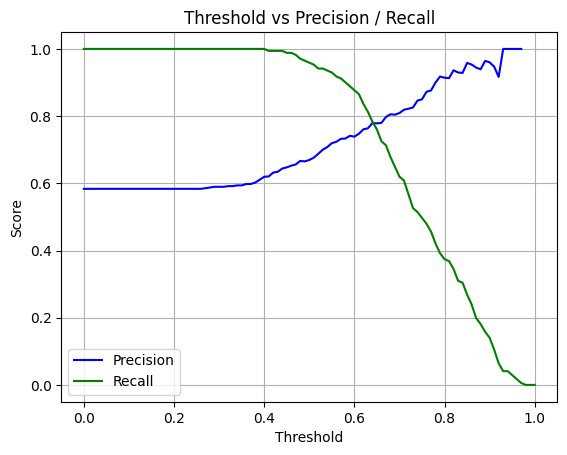

In [31]:
# plot indexes

plt.figure()
plt.plot(df_scores['threshold'], df_scores['precision'], label='Precision', color='blue')
plt.plot(df_scores['threshold'], df_scores['recall'], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold vs Precision / Recall')
plt.grid()
plt.legend()
plt.show()



In [32]:

df_intersection_region = np.abs(df_scores['precision'] - df_scores['recall'])

df_intersection_region

0      0.416382
1      0.416382
2      0.416382
3      0.416382
4      0.416382
         ...   
96     0.982456
97     0.994152
98          NaN
99          NaN
100         NaN
Length: 101, dtype: float64

In [33]:
df_intersection_region.argmin()

np.int64(64)

In [34]:
df_scores.iloc[df_intersection_region.argmin()]

threshold      0.640000
tp           134.000000
fp            38.000000
fn            37.000000
tn            84.000000
precision      0.779070
recall         0.783626
Name: 64, dtype: float64

In [35]:
df_scores.iloc[df_intersection_region.argmin()-1]

threshold      0.630000
tp           139.000000
fp            43.000000
fn            32.000000
tn            79.000000
precision      0.763736
recall         0.812865
Name: 63, dtype: float64

In [36]:
df_scores.iloc[df_intersection_region.argmin()+1]

threshold      0.650000
tp           130.000000
fp            37.000000
fn            41.000000
tn            85.000000
precision      0.778443
recall         0.760234
Name: 65, dtype: float64

# Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.14
- 0.34
- 0.54 ✅
- 0.74



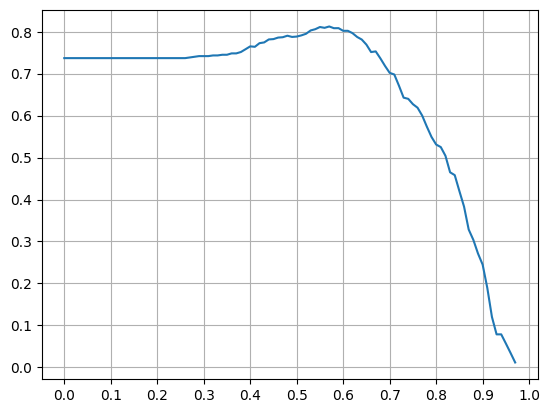

In [37]:
# compute f1
df_scores['f1'] = 2*df_scores.precision*df_scores.recall / (df_scores.precision + df_scores.recall)


# and plot it:
plt.plot(df_scores.threshold, df_scores.f1)
plt.xticks(np.linspace(0, 1, 11))
plt.grid()
plt.show()

In [38]:
df_scores['f1'].argmax()

np.int64(57)

In [39]:
df_scores.iloc[df_scores['f1'].argmax()]

threshold      0.570000
tp           156.000000
fp            57.000000
fn            15.000000
tn            65.000000
precision      0.732394
recall         0.912281
f1             0.812500
Name: 57, dtype: float64

# Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006 
- 0.06 ✅
- 0.36



In [40]:
def train_model(df_original, y, C=1.0):
    data = df_original[numerical_vars + categorical_vars].to_dict(orient='records')
    
    dv_dict = DictVectorizer(sparse=False)
    dv_dict.fit(data)

    X = dv_dict.transform(data)
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X, y)

    return dv_dict, model


def predict(df_original, dv_dict, model):
    data = df_original[numerical_vars + categorical_vars].to_dict(orient='records')
    
    X = dv_dict.transform(data)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [45]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [48]:
roc_auc_scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.converted
    y_val = df_val.converted

    dv, model = train_model(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    roc_auc = roc_auc_score(y_val, y_pred)
    roc_auc_scores.append(roc_auc)

print('The mean of ROC AUC scores is %f, with a SD of %f' % (np.mean(roc_auc_scores), np.std(roc_auc_scores)))

The mean of ROC AUC scores is 0.822109, with a SD of 0.035807


# Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001  ✅
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.


In [50]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for c in [0.000001, 0.001, 1]:
    roc_auc_scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted
        y_val = df_val.converted

        dv, model = train_model(df_train, y_train, C=c)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        roc_auc_scores.append(auc)

    print('C=%s, mean: %f, SD: %f' % (c, np.mean(roc_auc_scores), np.std(roc_auc_scores)))

C=1e-06, mean: 0.560208, SD: 0.023798
C=0.001, mean: 0.866878, SD: 0.028746
C=1, mean: 0.822109, SD: 0.035807
